In [1]:
import numpy as np
import pandas as pd
import librosa
import IPython.display as ipd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
# rcParams.update({'figure.autolayout': True, 'axes.titlepad': 20})

In [4]:
path = 'test.mp3'

In [5]:
y, sr = librosa.load(path)
print(y[:10])
print(y.shape)
print(sr)

[-2.9298815e-07 -6.8473224e-07  4.9651715e-07  1.6168354e-06
  1.5326195e-06  4.7078726e-07  5.5569222e-07  1.3579023e-06
  1.2510910e-07 -1.8650470e-06]
(186764,)
22050


In [6]:
pd.Series(y).head()

0   -2.929881e-07
1   -6.847322e-07
2    4.965171e-07
3    1.616835e-06
4    1.532620e-06
dtype: float32

In [7]:
intervals = librosa.effects.split(y, top_db=19)
print(intervals.shape)
print(intervals)

(9, 2)
[[  1024   3072]
 [  3584   5632]
 [  9728  19968]
 [ 23040  65536]
 [ 67584  69120]
 [ 76800 157696]
 [160768 177664]
 [178176 181760]
 [183296 186764]]


<AxesSubplot:title={'center':'test.mp3'}, xlabel='time', ylabel='db'>

findfont: Font family ['source sans pro'] not found. Falling back to DejaVu Sans.


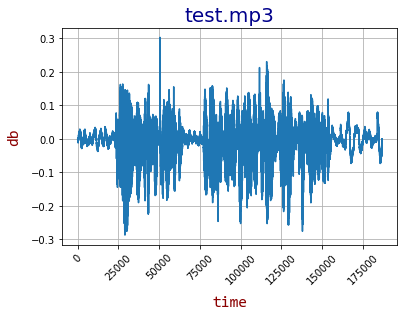

In [8]:
# Set fonts
title_font = {
    'family': 'source sans pro',
    'color':  'darkblue',
    'weight': 'normal',
    'size': 20,
}
labels_font = {
    'family': 'consolas',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
}

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_title("test.mp3", fontdict=title_font)
subplot.set_xlabel("time", fontdict=labels_font, labelpad=10)
subplot.set_ylabel("db", fontdict=labels_font, labelpad=10)
subplot.locator_params(nbins=10, axis='x')
pd.Series(y).plot(ax=subplot, rot=45, grid=True)

In [9]:
ipd.Audio(path)

In [10]:
import soundfile as sf
import noisereduce as nr

D:\anaconda3\envs\ai\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# 去除噪音
path = 'test_reduced_noise.mp3'
reduced_noise = nr.reduce_noise(y=y, sr=sr)
sf.write(path, reduced_noise, sr)

In [12]:
ipd.Audio(path)

In [13]:
y, sr = librosa.load(path)
print(y[:10])
print(y.shape)
print(sr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(186764,)
22050


<AxesSubplot:title={'center':'test.mp3'}, xlabel='time', ylabel='db'>

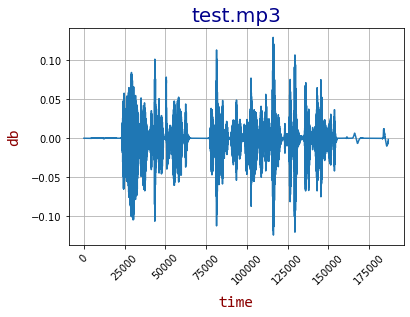

In [14]:
# Set fonts
title_font = {
    'family': 'source sans pro',
    'color':  'darkblue',
    'weight': 'normal',
    'size': 20,
}
labels_font = {
    'family': 'consolas',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
}

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_title("test.mp3", fontdict=title_font)
subplot.set_xlabel("time", fontdict=labels_font, labelpad=10)
subplot.set_ylabel("db", fontdict=labels_font, labelpad=10)
subplot.locator_params(nbins=10, axis='x')
pd.Series(y).plot(ax=subplot, rot=45, grid=True)

In [15]:
seconds = librosa.get_duration(y=y)
y.shape[0]/seconds

22050.0

In [16]:
intervals = librosa.effects.split(y, top_db=30)
print(intervals.shape)
print(intervals)

(5, 2)
[[ 23040  64512]
 [ 76800 133632]
 [134656 155648]
 [164864 169984]
 [183296 186764]]


In [17]:
time_intervals = intervals/sr
time_intervals

array([[1.04489796, 2.92571429],
       [3.4829932 , 6.06040816],
       [6.10684807, 7.05886621],
       [7.4768254 , 7.70902494],
       [8.31274376, 8.47002268]])

## 微调每段语音的起止时间

In [18]:
df = pd.DataFrame(time_intervals)
df.iloc[:, 0] = df.iloc[:, 0].sub(0.1)
df.iloc[:, 1] = df.iloc[:, 1].add(0.1)
time_intervals = df.to_numpy()
time_intervals

array([[0.94489796, 3.02571429],
       [3.3829932 , 6.16040816],
       [6.00684807, 7.15886621],
       [7.3768254 , 7.80902494],
       [8.21274376, 8.57002268]])

In [19]:
df = pd.DataFrame(intervals)
df.iloc[:, 0] = df.iloc[:, 0].sub(0.1*sr)
df.iloc[:, 1] = df.iloc[:, 1].add(0.1*sr)
intervals = df.astype(int).to_numpy()
intervals

array([[ 20835,  66717],
       [ 74595, 135837],
       [132451, 157853],
       [162659, 172189],
       [181091, 188969]])

In [20]:
ipd.Audio(data=y[intervals[0][0]:intervals[0][1]], rate=sr)

In [21]:
ipd.Audio(data=y[intervals[1][0]:intervals[1][1]], rate=sr)

In [22]:
ipd.Audio(data=y[intervals[2][0]:intervals[2][1]], rate=sr)

In [23]:
ipd.Audio(data=y[intervals[3][0]:intervals[3][1]], rate=sr)

In [24]:
ipd.Audio(data=y[intervals[4][0]:intervals[4][1]], rate=sr)